In [17]:
#Read raster file, wrap to smaller resolution and write to file
import os
import rasterio as rio
from rasterio.mask import mask
from shapely.geometry import box

#for plotting
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
#list raster input paths
input_folder = "d:\\klein\\KRW-verkenner 2.0\\example_markermeer\\1_input_tiff\\"
output_folder = "d:\\_checkouts\\decoimpact_examples\\tests\\rawdata\\lakemarken_rasters\\"
raster_names = [
    "watertemperaturesummer_celsius_watercolumn.tif",
    "waterdepthsummer_meter_watercolumn.tif",
    "substrate_class_waterbed.tif",
    "subareas_coefficient_markermeer.tif",
    "silt_fraction_waterbed.tif",
    "shellsubstrate_fraction_waterbed.tif",
    "oxygen_saturation_watercolumn.tif",
    "orthophosphate_concentration_watercolumn.tif",
    "inorganicsuspendedsolids_concentration_watercolumn.tif",
    "chlorophylla_concentration_watercolumn.tif"
    ]

raster_paths = dict(zip(
    [os.path.join(input_folder, rst_name) for rst_name in raster_names],
    [os.path.join(output_folder, rst_name) for rst_name in raster_names],
    ))

In [23]:
#Read raster file, wrap to smaller resolution and write to file
xres=250
yres=250
resample_alg = rio.enums.Resampling.nearest
crs = rio.crs.CRS.from_string("EPSG:28992") #RDNEW

for raster_in_path in raster_paths.keys():
    with rio.open(raster_in_path) as src:
        data, transform = rio.warp.reproject(source=src.read(),
                src_transform=src.transform,
                src_crs=crs,
                dst_crs=crs,
                dst_nodata=src.nodata,
                dst_resolution= (xres,yres),
                resampling=resample_alg)
     
        profile = src.profile
        profile.update(transform=transform, driver='GTiff',
                        height=data.shape[1], width=data.shape[2])

        with rio.open(raster_paths[raster_in_path], 'w', **profile) as dst:
                dst.write(data)
    
    print("output_written : "+ raster_paths[raster_in_path])

output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\watertemperaturesummer_celsius_watercolumn.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\waterdepthsummer_meter_watercolumn.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\substrate_class_waterbed.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\subareas_coefficient_markermeer.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\silt_fraction_waterbed.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\shellsubstrate_fraction_waterbed.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\oxygen_saturation_watercolumn.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\orthophosphate_concentration_watercolumn.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\inorganicsuspendedsolids_concentration_watercolumn.tif
output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\c

[]

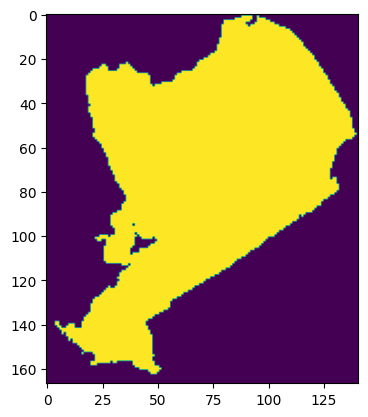

In [32]:
#plot the last result
raster = rio.open(raster_paths[raster_in_path])
data = raster.read()

plt.imshow(data[0])
plt.plot()

In [ ]:
#make cutout of bathymetry Lake Volkerak-Zoom
input_bathymetry_raster_path = "p:\\11202493--systeemrap-grevelingen\\1_data\\"+\
                         "Volkerak\BaselineBathymetry\Bodemligging_VolkerakZoommeer_25x25m.tif"
output_bathymetry_raster_path = "d:\\_checkouts\\decoimpact_examples\\tests\\rawdata\\lakevolkerak_rasters\\bathymetry_VolkerakZoommeer_25x25m.tif"
boundingbox = ((75000, 76000),(405300, 406100)) #RDNEW
crs = rio.crs.CRS.from_string("EPSG:28992") #RDNEW

with rio.open(input_bathymetry_raster_path,'r') as src:
    box_coor = rio.warp.transform_bounds(
        src_crs = crs,
        dst_crs = crs, 
        left = boundingbox[0][0], 
        bottom = boundingbox[1][0],
        right = boundingbox[0][1],
        top = boundingbox[1][1]
        )
    geom_box = [box(box_coor[0], box_coor[1], box_coor[2], box_coor[3])]
    out_image, out_transform = mask(src, geom_box, crop=True)
    out_meta = src.meta.copy()
    
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })

    with rio.open(output_bathymetry_raster_path, "w", **out_meta) as dest:
        dest.write(out_image)
            
    print("output_written : "+ output_bathymetry_raster_path)

output_written : d:\_checkouts\decoimpact_examples\tests\rawdata\lakevolkerak_rasters\bathymetry_VolkerakZoommeer_25x25m.tif
